<a href="https://colab.research.google.com/github/hawc2/Coding-Working-Group/blob/master/Star_Trek_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Star Trek API

This script queries the Star Trek API and visualizes the data in R

# To Dos

Refine alternate queries and a basic visualize

Upload draft to new Github repo

Share with Star Trek team . . . 


## Relevant Resources

[Stapi API Guide - Primary Source of this Notebook](https://leonawicz.github.io/rtrek/articles/stapi.html)

[Stapi API Homepage](http://stapi.co/)

[Rtrek for Stapi API](https://rdrr.io/cran/rtrek/man/stapi.html)

[Data Source - Memory Alpha](https://memory-alpha.fandom.com/wiki/Portal:Main)

[R in Google Colab](https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497)

---



# Set up Dependencies

In [ ]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [ ]:
%%R
install.packages("dplyr")
install.packages("rtrek")
install.packages("ggplot2")
install.packages("showtext")
install.packages("trekfont")
library(trekfont)
library(dplyr)
library(rtrek)
library(ggplot2)
library(showtext)

---

# Query STAPI API

In [ ]:
%%R
stapi("character", page_count = TRUE) # check first
stapi("character", page = 2) %>% select(1:2)
Q <- stapi("character", uid = "CHMA0000025118")
Q$episodes %>% select(uid, title, stardateFrom, stardateTo)

Total pages to retrieve all results: 66 
             uid                 title stardateFrom stardateTo
1 EPMA0000001458    All Good Things...      47988.0    47988.0
2 EPMA0000000845                Q-Less      46531.2    46531.2
3 EPMA0000001329                 Q Who      42761.3    42761.3
4 EPMA0000000651              Tapestry           NA         NA
5 EPMA0000001510    The Q and the Grey      50384.2    50392.7
6 EPMA0000000483 Encounter at Farpoint      41153.7    41153.7
7 EPMA0000162588            Death Wish           NA         NA
8 EPMA0000001413                True Q      46192.3    46192.3
9 EPMA0000001377                  Qpid      44741.9    44741.9


# Explore Data

In [ ]:
%%R
stapiEntities

# A tibble: 40 x 4
   id                 class   ncol colnames    
   <chr>              <chr>  <int> <named list>
 1 animal             tbl_df     7 <chr [7]>   
 2 astronomicalObject tbl_df     5 <chr [5]>   
 3 book               tbl_df    24 <chr [24]>  
 4 bookCollection     tbl_df    10 <chr [10]>  
 5 bookSeries         tbl_df    11 <chr [11]>  
 6 character          tbl_df    24 <chr [24]>  
 7 comicCollection    tbl_df    14 <chr [14]>  
 8 comics             tbl_df    15 <chr [15]>  
 9 comicSeries        tbl_df    15 <chr [15]>  
10 comicStrip         tbl_df    12 <chr [12]>  
# … with 30 more rows


In [ ]:
%%R
stapi("character", page_count = TRUE)

Total pages to retrieve all results: 66 


In [ ]:
%%R
stapi("character", page = 1) %>% select(uid, name)

# A tibble: 100 x 2
   uid            name            
   <chr>          <chr>           
 1 CHMA0000021696 Pechetti        
 2 CHMA0000028502 Pomet           
 3 CHMA0000134966 Eddie Newsom    
 4 CHMA0000101321 T. Virts        
 5 CHMA0000053158 Annabelle series
 6 CHMA0000008975 Torias Dax      
 7 CHMA0000232471 T. Peel         
 8 CHMA0000087568 Grathon Tolar   
 9 CHMA0000190805 C. Russell      
10 CHMA0000069617 Mike Vejar      
# … with 90 more rows


In [ ]:
%%R
Q <- "CHMA0000025118"
Q <- stapi("character", uid = Q)

q_eps <- Q$episodes %>% select(uid, title, stardateFrom, stardateTo)
q_eps

             uid                 title stardateFrom stardateTo
1 EPMA0000001458    All Good Things...      47988.0    47988.0
2 EPMA0000000845                Q-Less      46531.2    46531.2
3 EPMA0000001329                 Q Who      42761.3    42761.3
4 EPMA0000000651              Tapestry           NA         NA
5 EPMA0000001510    The Q and the Grey      50384.2    50392.7
6 EPMA0000000483 Encounter at Farpoint      41153.7    41153.7
7 EPMA0000162588            Death Wish           NA         NA
8 EPMA0000001413                True Q      46192.3    46192.3
9 EPMA0000001377                  Qpid      44741.9    44741.9


In [ ]:
%%R
eps <- c("Encounter at Farpoint", "All Good Things...")
q_eps <- filter(q_eps, title %in% eps)
q_eps

             uid                 title stardateFrom stardateTo
1 EPMA0000001458    All Good Things...      47988.0    47988.0
2 EPMA0000000483 Encounter at Farpoint      41153.7    41153.7


In [ ]:
%%R
eaf <- stapi("episode", uid = q_eps$uid[q_eps$title == eps[1]])
agt <- stapi("episode", uid = q_eps$uid[q_eps$title == eps[2]])
characters <- setdiff(intersect(eaf$characters$name, agt$characters$name), "Q")
characters

[1] "Deanna Troi"      "William T. Riker" "Geordi La Forge"  "Worf"            
[5] "Data"             "Jean-Luc Picard"  "Beverly Crusher" 


In [ ]:
%%R
characters <- eaf$characters %>% select(uid, name) %>% filter(name %in% characters)
characters

             uid             name
1 CHMA0000123101      Deanna Troi
2 CHMA0000123073 William T. Riker
3 CHMA0000132570  Geordi La Forge
4 CHMA0000123141             Worf
5 CHMA0000128858             Data
6 CHMA0000132571  Jean-Luc Picard
7 CHMA0000123143  Beverly Crusher


# Visualize Data

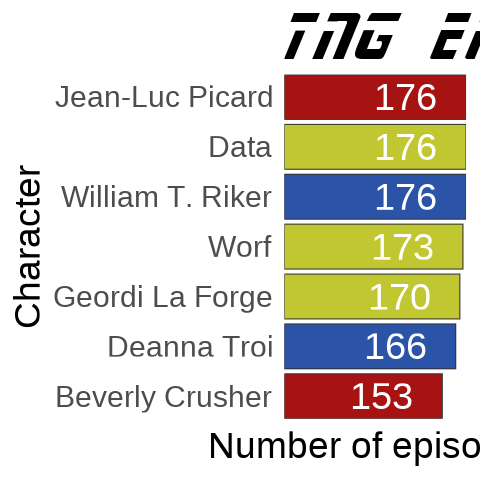

In [ ]:
%%R
eps_count <- rowwise(characters) %>% 
  do(stapi("character", uid = .$uid)$episodes$series %>% 
       summarize(n = sum(title == "Star Trek: The Next Generation"))
  )
eps_count <- select(characters, name) %>% bind_cols(eps_count)

font_add("StarNext", system.file(paste0("fonts/StarNext.ttf"), package = "trekfont"))
showtext_auto()

uniforms <- c("#2b53a7", "#c1c730", "#a71313")[c(1, 1, 2, 2, 2, 3, 3)]
eb <- element_blank()

ggplot(eps_count, aes(factor(name, levels = name[order(n)]), n)) + 
  geom_col(fill = uniforms, color = "gray20") + coord_flip() + 
  theme_minimal(base_size = 28) + 
  theme(plot.title = element_text(family = "StarNext"), line = eb, axis.text.x = eb) +
  scale_x_discrete(expand = c(0, 0)) + scale_y_continuous(expand = c(0, 0)) +
  labs(x = "Character", y = "Number of episodes", title = "TNG EPISODE APPEARANCES") +
  geom_text(aes(label = n), color = "white", size = 10, hjust = 1.5)